# Proejct 1: Edge Detection/Hough Transform From Orion Weller

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">1 hour</span>
* A2. Gradient Orientation: <span style="color:red;">30 min</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">1 hour</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">15 min</span>
* B. Hough Transform (Circles):  <span style="color:red;">5 hours</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

In [677]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/orionweller/Personal/cs450/jupyter_env/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [678]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm  # notebook compatible
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['axes.titlesize'] = '16'
plt.rcParams['axes.titleweight'] = 'bold'

import cv2
def just_title(title):
    a = plt.gca()
    a.set_title(title, fontdict={'fontsize': rcParams['axes.titlesize'],
                                 'fontweight' : rcParams['axes.titleweight'],
                                 'verticalalignment': 'baseline',
                                 'horizontalalignment': 'center'})
    a.set_xticks([])
    a.set_yticks([])
    
def color2gray(image):
    
    result = image[:, :, 0] * 0.299 + image[:, :, 1] * 0.587 + image[:, :, 2] * 0.114

    return result

from scipy import misc

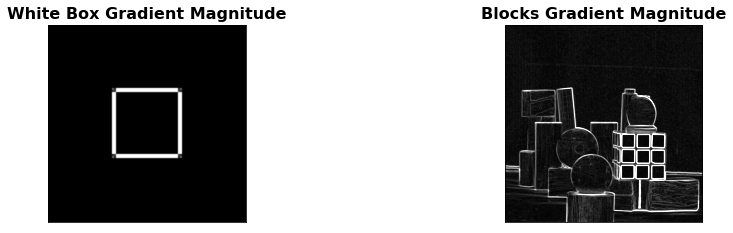

In [682]:
# Part 1. Compute the Gradient Magnitude

# construct the Sobel x-axis kernel
sobelX = np.array((
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]), dtype="int")
    
def map_to_uint8(image):
    # take the Sobel kernel and make sure that 
    abs_sobel64f = np.absolute(image)
    sobel_8u = np.uint8(abs_sobel64f)
    return sobel_8u

def rescale(image):
    return (image +1)*255/2

def get_gradients(img):
    convolved_Y = map_to_uint8(cv2.filter2D(img, cv2.CV_64F, sobelY))
    convolved_X = map_to_uint8(cv2.filter2D(img, cv2.CV_64F, sobelX))
    return convolved_X, convolved_Y

def get_gradient_magnitude(img):
    convolved_X = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    convolved_Y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    magnitude = np.sqrt(np.square(convolved_X) + np.square(convolved_Y)).astype(np.float64)
    return magnitude

plt.subplot(221)
white_box = color2gray(cv2.imread('2D_White_Box.png'))
plt.imshow((get_gradient_magnitude(white_box)).astype(np.uint8),cmap="gray")
just_title("White Box Gradient Magnitude")


plt.subplot(222)
blocks = color2gray(cv2.imread('blocks.png'))
plt.imshow(get_gradient_magnitude(blocks).astype(np.float32),cmap="gray", vmin=0, vmax=255)
just_title("Blocks Gradient Magnitude")


## Answer: Honestly the results with no thresholding work well.  I played around with thresholding it in 
# section A4 and found that around 80 was best, while around 10-20 was a little low

# Show your results on the blocks image

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

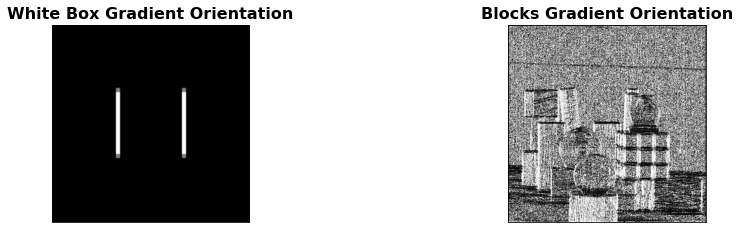

In [680]:
# Part 2. Compute the Gradient Orientation

def get_orientation(img):
    convolved_X, convolved_Y = get_gradients(img)
    return np.arctan2(convolved_X,convolved_Y).astype(float)

plt.subplot(221)
plt.imshow(get_orientation(white_box),cmap="gray")
just_title("White Box Gradient Orientation")


plt.subplot(222)
plt.imshow(get_orientation(blocks),cmap="gray")
just_title("Blocks Gradient Orientation")

# Show your results on the blocks image

<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



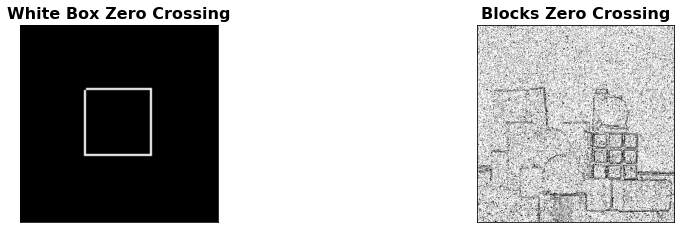

In [679]:
# Part 3. Find the Zero Crossings
laplacian = np.array([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0]])


def zero_find(img):
    blurred = (img[:-1] * img[1:]) < 0
    straight_blur = blurred.reshape(-1)
    blurred = np.append(straight_blur, blurred[-1, :].reshape(-1)).reshape(img.shape[0], -1)
    return blurred

def zero_crossings(img):
    blurred = cv2.filter2D(img, cv2.CV_64F, laplacian)
    found_x = zero_find(blurred)
    found_y = zero_find(np.rot90(blurred, axes=(1,0)))
    found_y = np.rot90(found_y, axes=(0, 1))
    found_all = found_x + found_y
    return found_all
    

    
# Show the results on blocks image
plt.subplot(221)
box_zcr = zero_crossings(white_box)
plt.imshow(box_zcr,cmap="gray")
just_title("White Box Zero Crossing")

plt.subplot(222)
blocks_zcr = zero_crossings(blocks)
plt.imshow(blocks_zcr,cmap="gray")
just_title("Blocks Zero Crossing")

<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


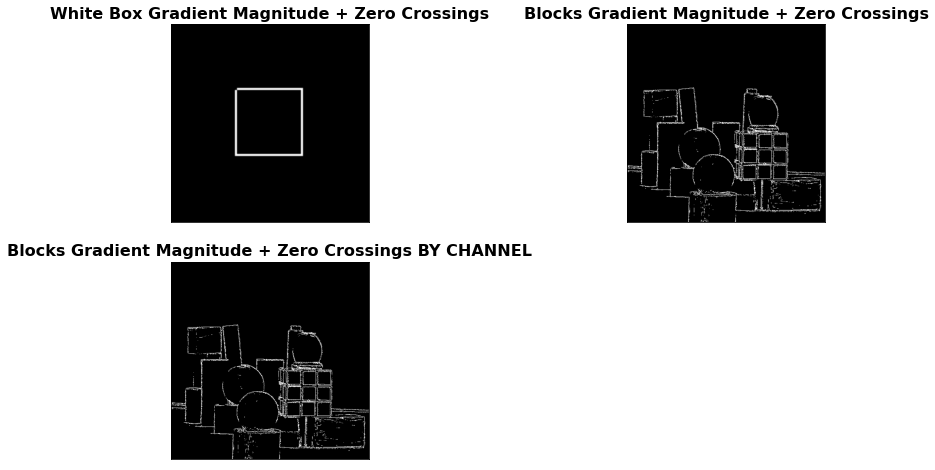

In [685]:
# Part 4. Final Solution

def get_edges(img, threshold=20):
    magnitude = get_gradient_magnitude(img) > threshold
    zero_crossing = zero_crossings(img)
    together = zero_crossing & magnitude
    return together

def compute_edges_by_channel(img, threshold: int, blur: str):
    all_edges = []
    for channel in range(img.shape[-1]):
        if blur == "none":
            blur_img = img[:, :, channel] 
        elif blur == "gaussian":
            blur_img = cv2.GaussianBlur(img[:, :, channel],(5,5),0)
        elif blur == "median":
            blur_img = cv2.medianBlur(img[:, :, channel], 7)
            blur_img = cv2.GaussianBlur(blur_img,(5,5),0)

        else:
            print("Blur bad:", blur)
            raise Exception(blur)
        all_edges.append(get_edges(blur_img, threshold))
    max_edges = np.logical_or.reduce(all_edges)
    return max_edges

plt.subplot(221)
plt.imshow(get_edges(white_box, threshold=80),cmap="gray", clim=(0, 1))
just_title("White Box Gradient Magnitude + Zero Crossings")

plt.subplot(222)
plt.imshow(get_edges(blocks, threshold=80),cmap="gray")
just_title("Blocks Gradient Magnitude + Zero Crossings")

plt.subplot(223)
plt.imshow(compute_edges_by_channel(cv2.imread('blocks.png'), threshold=80, blur="none"),cmap="gray")
just_title("Blocks Gradient Magnitude + Zero Crossings BY CHANNEL")

##### Part A: Write-up

<span style="color:blue">The detection seems to go pretty well, I do wonder about some of the techniques applied on the pictures you showed - IDK how to do them in the blue-red-green color scheme.  I think the thresholding can make a big difference too, for the gradient magnitude.  I think that was the only thing to respond to.</span>



<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

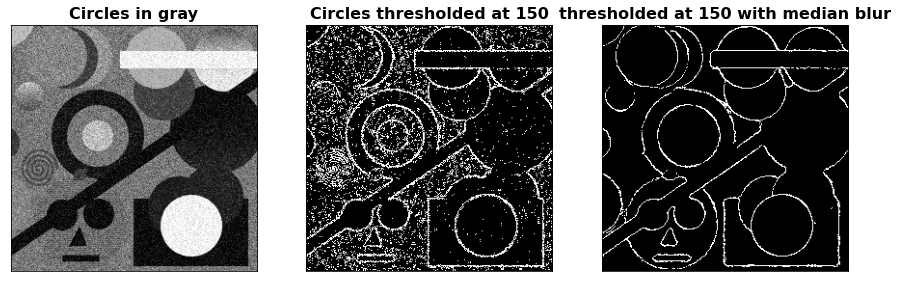

In [692]:
## Just to look at the edges it finds and pick a good threshold ##
plt.subplot(131)
plt.imshow(color2gray(cv2.imread('circles.png')), cmap="gray")
just_title("Circles in gray")

plt.subplot(132)
plt.imshow(get_edges(color2gray(cv2.imread('circles.png')), threshold=150), cmap="gray")
just_title("Circles thresholded at 150")

plt.subplot(133)
plt.imshow(compute_edges_by_channel(cv2.imread('circles.png'), threshold=150, blur="median"), cmap="gray")
just_title("thresholded at 150 with median blur")

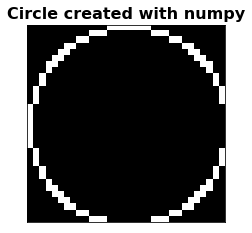

In [693]:
def create_circle_np(radius=16):
    """
    Will not use - want a nicer circle instead, just wanted to show I could do it this way
    """
    xx, yy = np.mgrid[:radius*2, :radius*2]
    circle = (xx - radius) ** 2 + (yy - radius) ** 2
    return np.logical_and(circle < (radius**2 + radius), circle > (radius**2 - radius))

circle = create_circle_np()
plt.subplot(221)
plt.imshow(circle, cmap="gray", clim=(0, 1))
just_title("Circle created with numpy")

/Users/orionweller/Personal/cs450/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  del sys.path[0]


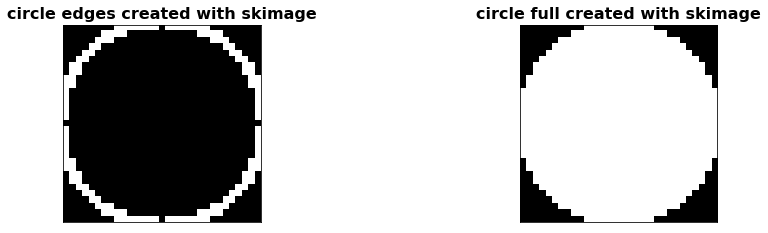

In [697]:
from skimage.draw import circle_perimeter, circle, circle_perimeter_aa

def create_circle_sk(radius=16):
    # Uses a nice anti-aliasing instead
    img = np.zeros((radius*2, radius*2), dtype=np.uint8)
    rr, cc, val = circle_perimeter_aa(radius, radius, radius, shape=(radius*2, radius*2))
    img[rr, cc] = val * 255
    return img

def create_circle_sk_filled(radius=16):
    # Uses a nice anti-aliasing instead
    img = np.zeros((radius*2, radius*2), dtype=np.uint8)
    rr, cc = circle(radius, radius, radius, shape=(radius*2, radius*2))
    img[rr, cc] = 1.0
    return img

plt.subplot(221)
sk_circle = create_circle_sk()
plt.imshow(sk_circle[1:,1:], cmap="gray", clim=(0, 1))
just_title("circle edges created with skimage")

plt.subplot(222)
sk_circle = create_circle_sk_filled()
plt.imshow(sk_circle[1:,1:], cmap="gray", clim=(0, 1))
just_title("circle full created with skimage")

In [698]:
# Part B - Hough Transform - code below
import copy

CIRCLE_32 = create_circle_sk(radius=16)
CIRCLE_64 = create_circle_sk(radius=32)
CIRCLE_96 = create_circle_sk(radius=48)

CIRCLE_32F = create_circle_sk_filled(radius=16)
CIRCLE_64F = create_circle_sk_filled(radius=32)
CIRCLE_96F = create_circle_sk_filled(radius=48)

map_circles = {
    16: CIRCLE_32,
    32: CIRCLE_64,
    48: CIRCLE_96,
}

map_circles_f = {
    16: CIRCLE_32F,
    32: CIRCLE_64F,
    48: CIRCLE_96F,
}

def mask_circle(circle, horizontal=True):
    circle = copy.deepcopy(circle)
    to_mask = int(circle.shape[0] / 6)
    if not horizontal:
        circle[0:to_mask, :] = 0
        circle[-1 * to_mask:, :] = 0
    else:
        circle[:, 0:to_mask] = 0
        circle[:, -1 * to_mask:] = 0
    return circle
    
def add_circle_to_accum(row_num: int, col_num: int, accum: np.array, radius=16, orientation=None, weight_edges=False):
    # translate normal image coordinates to padded accum coordinates
    row_num += radius
    col_num += radius
    
    # now make the section that will add the circle
    left, right, up, down = (row_num - radius), (row_num + radius), (col_num - radius), (col_num + radius)
    if orientation is not None:
        circle_to_add = mask_circle(map_circles[radius], horizontal=orientation<0.75)
    else:
        circle_to_add = map_circles[radius]
        
    # didn't end up using this weighting section, couldn't figure it out
    if up < radius and weight_edges:
        weight_flag = 2
    else:
        weight_flag = 1
    
    for iterations in range(weight_flag):
        accum[int(left):int(right), int(up):int(down)] += circle_to_add
    return accum

# code for adding a circle without using cv2.circle, was just easier to use cv2.circle
# def set_circle(img, row, col, radius, circle_to_add):
#     left, right, up, down = (row - radius), (row + radius), (col - radius), (col + radius)
# #     if left < 0:
# #         circle_to_add = circle_to_add[0-left:]
# #         left = 0
# #     if up < 0:
# #         circle_to_add = circle_to_add[:0-up]
# #         up = 0
#     try:
#         img[int(left):int(right), int(up):int(down)] = circle_to_add
#     except Exception as e:
#         print(left, right, up, down)
#     return img


def plot_circles_on_image(img_given, radius, accum_given, accum_threshold, too_close_pixels, too_close_count):
    img = copy.deepcopy(img_given)
    accum = copy.deepcopy(accum_given)
    
    # circles to use for the max
    circle_to_add_f = map_circles_f[radius] # circle full
    circle_to_add_o = map_circles[radius] # circle outline

    image_to_ret = np.zeros(img.shape[:-1])
    next_max = accum.max()
    maxes = []
    # go through all the maxes up to the threshold
    while next_max > accum_threshold:
        index_of_max = np.unravel_index(np.argmax(accum, axis=None), accum.shape)
        maxes.append((index_of_max, accum[index_of_max]))
        accum[index_of_max] = 0
        next_max = accum.max()

    real_maxes = []
    dont_keep = []
    print("Found {} maxes".format(len(maxes)))
    for index, ((row, col), max_val) in enumerate(maxes):
        if index in dont_keep:
            continue

        counter = 0
        # check all other points
        for index_2, ((row_2, col_2), max_val_2) in enumerate(maxes):
            if row_2 == row and col_2 == col:
                continue
            # check if they're too close
            dist = np.sqrt(abs(row - row_2) + abs(col - col_2))
            if dist < too_close_pixels:
                dont_keep.append(index_2)
                counter += 1

        # too many close points, probably not a circle
        if counter > too_close_count:
            print("Counter too close for ", (row, col))
            dont_keep.append(index)


    # remove the ones we don't want to keep
    for index, ((row, col), max_val) in enumerate(maxes):
        if index not in dont_keep:
            real_maxes.append((row, col))

    # create the mask for ones we want to keep
    for (row, col) in real_maxes:
        row_num, col_num = row-radius, col-radius
        img = cv2.circle(img, (col_num, row_num), radius, (255, 0, 0), 5)
    
    return img

def hough(img, radius=16, threshold=130, accum_threshold=11000, orientation=True, 
            too_close_pixels=-1, too_close_count=100, weight_edges=False,
             blur="gaussian"):
    og_img = img
    accum = np.zeros((img.shape[0] + radius*2, img.shape[1] + radius*2))
    if len(img.shape) > 2:
        edge_imgs = compute_edges_by_channel(img, threshold, blur=blur)
    else:
        edge_imgs = get_edges(img, threshold)

    orient = get_orientation(color2gray(img) if len(img.shape) > 2 else img)
    
    for row_num in tqdm(range(edge_imgs.shape[0]), leave=False):
        for col_num in range(edge_imgs.shape[1]):
            if edge_imgs[row_num, col_num]:
                if orientation:
                    cur_orient = orient[row_num, col_num]
                else:
                    cur_orient = None
                accum = add_circle_to_accum(row_num, col_num, accum, radius=radius,
                                            orientation=cur_orient, weight_edges=weight_edges)

    img_final = plot_circles_on_image(og_img, radius, accum, accum_threshold, too_close_pixels, too_close_count)
                
    return accum, edge_imgs, img_final


/Users/orionweller/Personal/cs450/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  del sys.path[0]


Found 21 maxes
Counter too close for  (168, 43)


Found 73 maxes


Found 36 maxes


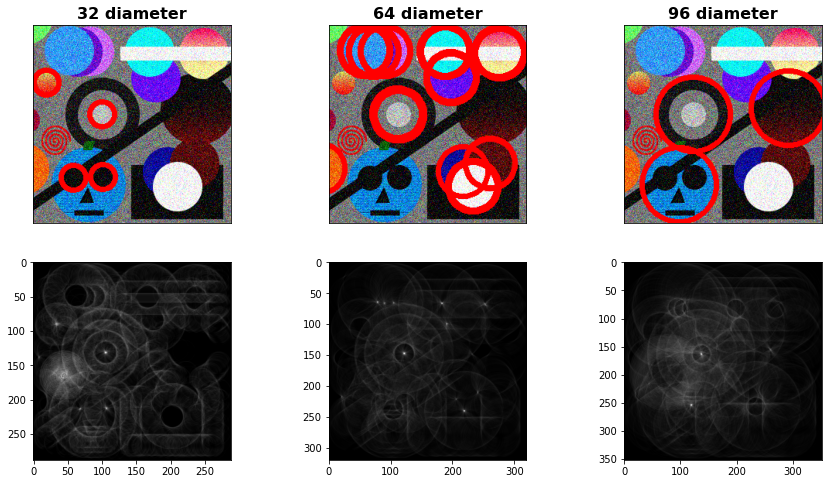

In [712]:
circles = cv2.imread('circles.png')

plt.subplot(231)
accum_16, edges_16, final_image = hough(copy.deepcopy(circles), radius=16, orientation=False, 
                                     threshold=120, accum_threshold=11000, 
                                     too_close_pixels=5, too_close_count=5)
plt.imshow(final_image, cmap="gray")
just_title("32 diameter")

plt.subplot(232)
accum_32, edges_32, final_image = hough(copy.deepcopy(circles), radius=32, blur="median",
                                     orientation=False, threshold=100, accum_threshold=12100, 
                                     too_close_pixels=1, too_close_count=3)
plt.imshow(final_image, cmap="gray")
just_title("64 diameter")

plt.subplot(233)
accum_48, edges_48, final_image = hough(copy.deepcopy(circles), radius=48, blur="gaussian",
                                     orientation=False, threshold=120, accum_threshold=17700,
                                    too_close_pixels=5, too_close_count=20)
plt.imshow(final_image, cmap="gray")
just_title("96 diameter")

plt.subplot(234)
plt.imshow(accum_16, cmap="gray")

plt.subplot(235)
plt.imshow(accum_32, cmap="gray")

plt.subplot(236)
plt.imshow(accum_48, cmap="gray")

# some plots of the edges to help me when I was tuning
# plt.subplot(337)
# plt.imshow(edges_16, cmap="gray")

# plt.subplot(338)
# plt.imshow(edges_32, cmap="gray")

# plt.subplot(339)
# plt.imshow(edges_48, cmap="gray")

##### Part B: Write-up

<span style="color:blue">Some of my main takeaways were that these require a lot of tweaking parameters to get right.  The tips you mentioned in class and online were super neccesary, aka nearby suppression of pixels in the accumulator, blurring before using (had to use two blurs to get the 32 radius circles) and thresholding both the accumulator values and the edge detection threshold. I still am not able to get the top left medium circle - I never quite figured out the weighting there - I just got lucky and got the orange medium circle through the blurring techniques.  I did have the acculator vote for centers outside of the image though, using the 1 radius of padding technique - I just never got the weighting right for that top left one.  I also tried taking the orientation into account but it only somewhat worked.</span>

<span style="color:blue">It was definitely an interesting lab though, and I can see why this kind of work was so hard before deep learning. I also appreciate that we get to learn some of the background of the CV field - these are interesting algorithms.  I think that to get the last circle and to make these results generalize better, I would need to get the orientation part done well and fix the weighting technique for circles off the edge.  Otherwise, there's just a lot of tuning that's needed.</span>